##**Test for an image -**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Please upload an image file


Saving WhatsApp Image 2024-12-15 at 11.44.55.jpeg to WhatsApp Image 2024-12-15 at 11.44.55.jpeg


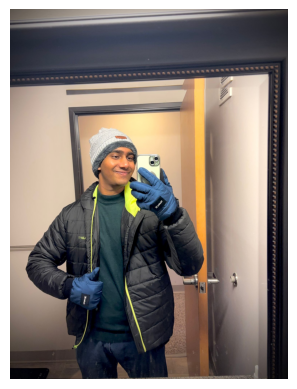

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Gender: Male
Confidence: 1.00


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from google.colab import files
from PIL import Image
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load gender recognition model
gender_model = load_model('/content/drive/MyDrive/gender_recognition_model.h5')

# Constants
gender_img_size = (128, 128)  # Gender model's input size

# Gender map
gender_map = {
    0: 'Male',
    1: 'Female'
}

# Function to predict gender
def predict_gender(model, image, target_size):
    # Resize the image to match model's expected size
    img_resized = cv2.resize(image, target_size)

    # Ensure the image is in the correct RGB format
    if len(img_resized.shape) == 2:  # If grayscale, convert to RGB
        img_resized = cv2.cvtColor(img_resized, cv2.COLOR_GRAY2RGB)
    else:  # If BGR, convert to RGB
        img_resized = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)

    # Normalize the image
    img_normalized = img_resized.astype('float32') / 255.0

    # Prepare the input for the model
    img_input = img_normalized.reshape(1, target_size[0], target_size[1], 3)

    # Predict gender
    prediction = model.predict(img_input)
    predicted_class = np.argmax(prediction)
    confidence = prediction[0][predicted_class]

    return gender_map[predicted_class], confidence

# Function to upload and predict gender
def upload_and_predict_gender():
    print("Please upload an image file")
    uploaded = files.upload()

    for filename in uploaded.keys():
        # Read the uploaded image
        img = cv2.imdecode(np.frombuffer(uploaded[filename], np.uint8), cv2.IMREAD_COLOR)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

        # Predict gender
        label, confidence = predict_gender(gender_model, img, gender_img_size)

        # Display result
        print(f"Predicted Gender: {label}")
        print(f"Confidence: {confidence:.2f}")

# Run the gender recognition function
upload_and_predict_gender()


##**Test for a video(multiple frames without video preview)**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from google.colab import files
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load gender recognition model
gender_model = load_model('/content/drive/MyDrive/gender_recognition_model.h5')

# Constants
gender_img_size = (128, 128)  # Gender model's input size

# Gender map
gender_map = {
    0: 'Male',
    1: 'Female'
}

# Function to predict gender from a frame
def predict_gender(model, frame, target_size):
    # Resize the frame to match model's expected size
    frame_resized = cv2.resize(frame, target_size)

    # Ensure the frame is in the correct RGB format
    if len(frame_resized.shape) == 2:  # If grayscale, convert to RGB
        frame_resized = cv2.cvtColor(frame_resized, cv2.COLOR_GRAY2RGB)
    else:  # If BGR, convert to RGB
        frame_resized = cv2.cvtColor(frame_resized, cv2.COLOR_BGR2RGB)

    # Normalize the frame
    frame_normalized = frame_resized.astype('float32') / 255.0

    # Prepare the input for the model
    frame_input = frame_normalized.reshape(1, target_size[0], target_size[1], 3)

    # Predict gender
    prediction = model.predict(frame_input)
    predicted_class = np.argmax(prediction)
    confidence = prediction[0][predicted_class]

    return gender_map[predicted_class], confidence

# Function to process video file and perform gender prediction
def process_video():
    print("Please upload a video file")
    uploaded = files.upload()

    for filename in uploaded.keys():
        # Open the uploaded video file
        video_path = filename
        cap = cv2.VideoCapture(video_path)

        if not cap.isOpened():
            print("Error: Could not open video file.")
            return

        frame_count = 0

        while True:
            ret, frame = cap.read()

            if not ret:
                print("End of video file.")
                break

            # Predict gender for the current frame
            label, confidence = predict_gender(gender_model, frame, gender_img_size)
            frame_count += 1

            # Display prediction
            print(f"Frame {frame_count}: Predicted Gender = {label}, Confidence = {confidence:.2f}")

        cap.release()

# Run the video processing function
process_video()


Mounted at /content/drive


Please upload a video file


Saving WhatsApp Video 2024-12-15 at 12.04.29.mp4 to WhatsApp Video 2024-12-15 at 12.04.29.mp4
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Frame 1: Predicted Gender = Male, Confidence = 1.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Frame 2: Predicted Gender = Male, Confidence = 1.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Frame 3: Predicted Gender = Male, Confidence = 1.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Frame 4: Predicted Gender = Male, Confidence = 1.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Frame 5: Predicted Gender = Male, Confidence = 1.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Frame 6: Predicted Gender = Male, Confidence = 0.99
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Frame 7: Predicted Gender = Male, Confidence = 1.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Frame 8: Predicted Gender = Male, Confidence = 0.99
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Frame 9: Predicted Gender = Male, Confidence = 1.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Frame 10: Predicted Gender = Male, Confidence = 0.99
1/1 ━━━

KeyboardInterrupt: 

##**Test for a video(aggregrated frames with video preview)**

Mounted at /content/drive


Please upload a video file


Saving WhatsApp Video 2024-12-15 at 12.04.29.mp4 to WhatsApp Video 2024-12-15 at 12.04.29 (1).mp4
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


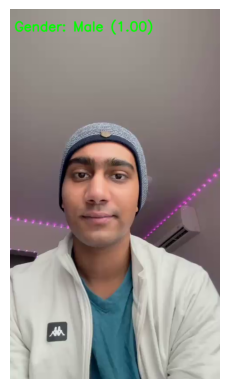

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


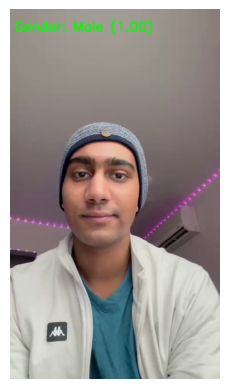

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


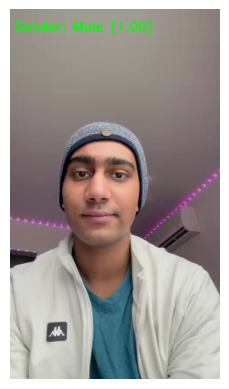

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Final Prediction (based on 10 frames): Male
Processing complete. Output video saved as 'output_with_predictions.mp4'.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from google.colab import files  # Ensure this import is correct
from google.colab import drive
from collections import Counter

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Load gender recognition model
gender_model = load_model('/content/drive/MyDrive/gender_recognition_model.h5')

# Constants
gender_img_size = (128, 128)  # Gender model's input size
gender_map = {
    0: 'Male',
    1: 'Female'
}

# Function to predict gender from a frame
def predict_gender(model, frame, target_size):
    # Resize the frame to match model's expected size
    frame_resized = cv2.resize(frame, target_size)

    # Ensure the frame is in the correct RGB format
    if len(frame_resized.shape) == 2:  # If grayscale, convert to RGB
        frame_resized = cv2.cvtColor(frame_resized, cv2.COLOR_GRAY2RGB)
    else:  # If BGR, convert to RGB
        frame_resized = cv2.cvtColor(frame_resized, cv2.COLOR_BGR2RGB)

    # Normalize the frame
    frame_normalized = frame_resized.astype('float32') / 255.0

    # Prepare the input for the model
    frame_input = frame_normalized.reshape(1, target_size[0], target_size[1], 3)

    # Predict gender
    prediction = model.predict(frame_input)
    predicted_class = np.argmax(prediction)
    confidence = prediction[0][predicted_class]

    return gender_map[predicted_class], confidence

# Function to process video and save predictions
def process_video_colab():
    print("Please upload a video file")
    uploaded = files.upload()  # Ensure file upload works correctly

    for filename in uploaded.keys():
        # Open the uploaded video file
        video_path = filename
        cap = cv2.VideoCapture(video_path)

        if not cap.isOpened():
            print("Error: Could not open video file.")
            return

        # Define output video writer
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')
        output_path = 'output_with_predictions.mp4'
        fps = int(cap.get(cv2.CAP_PROP_FPS))
        width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
        out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

        frame_count = 0
        gender_predictions = []  # Store predictions for 10 frames

        while frame_count < 10:
            ret, frame = cap.read()
            if not ret:
                print("End of video file.")
                break

            frame_count += 1

            # Predict gender for the current frame
            label, confidence = predict_gender(gender_model, frame, gender_img_size)
            gender_predictions.append(label)

            # Add prediction text to the frame
            cv2.putText(frame, f"Gender: {label} ({confidence:.2f})", (10, 50),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

            # Write the frame to the output video
            out.write(frame)

            # Optionally, display the frame in Colab (as static images, not live video)
            if frame_count <= 3:  # Display the first 3 frames for preview
                plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
                plt.axis('off')
                plt.show()

        cap.release()
        out.release()

        # Determine the most common prediction in 10 frames
        if gender_predictions:
            most_common_gender = Counter(gender_predictions).most_common(1)[0][0]
            print(f"Final Prediction (based on 10 frames): {most_common_gender}")

        # Save the output video for download
        print("Processing complete. Output video saved as 'output_with_predictions.mp4'.")
        files.download(output_path)

# Run the video processing function
process_video_colab()
